# How to handle missing values in machine learning

- "Data that is not present in a dataset" is called as missing/null data.
- Handling missing values is an essential aspect of data cleaning and preprocessing in machine learning tasks.

# Method 1: Delete the missing values

- This approach is the quickest but not the preferred one because there are high chances of ending up deleting important data.

**There are two ways to delete the data containing missing values:**

### 1.1 Delete the row with a missing value(s):

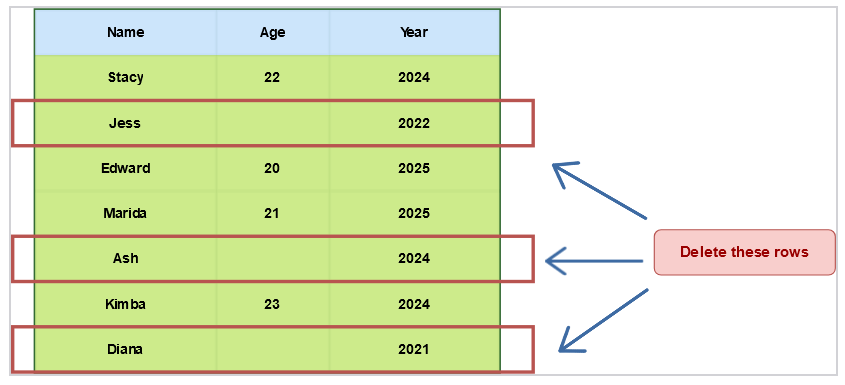

### Syntax:

    myDataFrame.dropna()

## 1.2 Delete the column with a missing value(s):

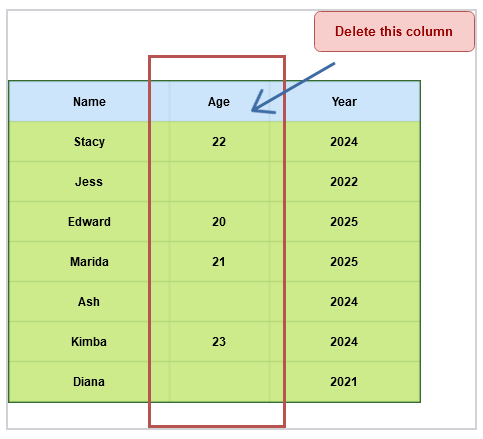

### Syntax:

    myDataFrame.drop(axis = 'columns')

In [2]:
import pandas as pd

data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
        'Age': [25, 31, 22, None, 27],
        'Gender': ['F', 'M', None, 'M', 'F'],
        'Salary': [50000, None, 30000, 40000, 60000]}

df = pd.DataFrame(data)
df

,Name,Age,Gender,Salary
0,Alice,25.0,F,50000.0
1,Bob,31.0,M,NaN
2,Charlie,22.0,None,30000.0
3,David,NaN,M,40000.0
4,Eva,27.0,F,60000.0


In [4]:
# CHECKING FOR NULL/MISSING VALUES

df.isnull().sum()

Name      0
Age       1
Gender    1
Salary    1
dtype: int64

## Drop the rows where at least one element is missing

In [4]:
df.dropna()

,Name,Age,Gender,Salary
0,Alice,25.0,F,50000.0
4,Eva,27.0,F,60000.0


## Drop the columns where at least one element is missing

In [5]:
df.dropna(axis='columns')

,Name
0,Alice
1,Bob
2,Charlie
3,David
4,Eva


## Drop the rows where all elements are missing

In [6]:
df.dropna(how='all')

,Name,Age,Gender,Salary
0,Alice,25.0,F,50000.0
1,Bob,31.0,M,NaN
2,Charlie,22.0,None,30000.0
3,David,NaN,M,40000.0
4,Eva,27.0,F,60000.0


## Keep only the rows with at least 2 non-NA values

In [9]:
df.dropna(thresh=3)

,Name,Age,Gender,Salary
0,Alice,25.0,F,50000.0
1,Bob,31.0,M,NaN
2,Charlie,22.0,None,30000.0
3,David,NaN,M,40000.0
4,Eva,27.0,F,60000.0


## Define in which columns to look for missing values

One common approach to handle null values is to delete the rows that contain them.

In [11]:
df.dropna(subset=['Age'])

,Name,Age,Gender,Salary
0,Alice,25.0,F,50000.0
1,Bob,31.0,M,NaN
2,Charlie,22.0,None,30000.0
4,Eva,27.0,F,60000.0


# Method 2: Filling out Missing Values

**In this case, we have several options to assign appropriate values. The most common ones are listed below:**

- Fill NA with Mean, Median or Mode of the data
- Fill NA with a constant value
- Forward Fill or Backward Fill NA
- Interpolate Data and Fill NA

### Syntax:

    myDataFrame.fillna()


### Fill Missing DataFrame Values with Column Mean, Median and Mode

In [12]:
import pandas as pd

missingDF = pd.read_csv("missing.csv")
missingDF

,First Name,Gender,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,97308.0,6.945,True,Marketing
1,Thomas,Male,61933.0,7.235,True,Marketing
2,Jerry,Male,NaN,9.340,True,Finance
3,Dennis,NaN,115163.0,10.125,False,Legal
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Female,NaN,11.598,NaN,Finance
6,Angela,NaN,NaN,18.523,True,Engineering
7,Shawn,Male,111737.0,6.414,False,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,Rachel,Female,142032.0,12.599,False,Business Development


In [35]:
missing_df

,First Name,Gender,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,97308.0,6.945,True,Marketing
1,Thomas,Male,61933.0,7.235,True,Marketing
2,Jerry,Male,NaN,9.340,True,Finance
3,Dennis,NaN,115163.0,10.125,False,Legal
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Female,NaN,11.598,NaN,Finance
6,Angela,NaN,NaN,18.523,True,Engineering
7,Shawn,Male,111737.0,6.414,False,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,Rachel,Female,142032.0,12.599,False,Business Development


In [44]:
missing_df.describe()['Salary']

count         7.000000
mean      88920.571429
std       37710.676246
min       36844.000000
25%       59680.000000
50%       97308.000000
75%      113450.000000
max      142032.000000
Name: Salary, dtype: float64

<Axes: >

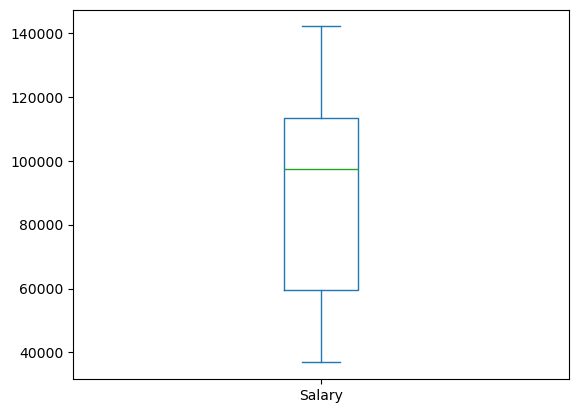

In [40]:
missing_df['Salary'].plot(kind="box")

In [45]:
# Using mean

salary_avg = round(missing_df['Salary'].mean())
print(salary_avg)

# Replacing NaN's using mean value
missing_df['Salary'] = missing_df['Salary'].fillna(salary_avg)
missing_df

88921


,First Name,Gender,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,97308.0,6.945,True,Marketing
1,Thomas,Male,61933.0,7.235,True,Marketing
2,Jerry,Male,88921.0,9.340,True,Finance
3,Dennis,NaN,115163.0,10.125,False,Legal
4,NaN,NaN,88921.0,NaN,NaN,NaN
5,NaN,Female,88921.0,11.598,NaN,Finance
6,Angela,NaN,88921.0,18.523,True,Engineering
7,Shawn,Male,111737.0,6.414,False,NaN
8,NaN,NaN,88921.0,NaN,NaN,NaN
9,Rachel,Female,142032.0,12.599,False,Business Development


In [49]:
missing_df['Team'].value_counts()

Team
Marketing               2
Finance                 2
Business Development    2
Legal                   1
Engineering             1
Client Services         1
Name: count, dtype: int64

In [51]:
# Using mode

missing_df['Team'] = missing_df['Team'].fillna(missing_df['Team'].mode()[0])
missing_df

,First Name,Gender,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,97308.0,6.945,True,Marketing
1,Thomas,Male,61933.0,7.235,True,Marketing
2,Jerry,Male,88921.0,9.340,True,Finance
3,Dennis,NaN,115163.0,10.125,False,Legal
4,NaN,NaN,88921.0,NaN,NaN,Business Development
5,NaN,Female,88921.0,11.598,NaN,Finance
6,Angela,NaN,88921.0,18.523,True,Engineering
7,Shawn,Male,111737.0,6.414,False,Business Development
8,NaN,NaN,88921.0,NaN,NaN,Business Development
9,Rachel,Female,142032.0,12.599,False,Business Development


### Fill Missing DataFrame Values with a Constant

In [53]:
ms = missing_df.fillna(0)
ms

,First Name,Gender,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,97308.0,6.945,True,Marketing
1,Thomas,Male,61933.0,7.235,True,Marketing
2,Jerry,Male,88921.0,9.340,True,Finance
3,Dennis,0,115163.0,10.125,False,Legal
4,0,0,88921.0,0.000,0,Business Development
5,0,Female,88921.0,11.598,0,Finance
6,Angela,0,88921.0,18.523,True,Engineering
7,Shawn,Male,111737.0,6.414,False,Business Development
8,0,0,88921.0,0.000,0,Business Development
9,Rachel,Female,142032.0,12.599,False,Business Development


### Forward Fill Missing DataFrame Values

In [18]:
import pandas as pd

data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
        'Age': [25, 31, 22, None, 27],
        'Gender': ['F', 'M', None, 'M', 'F'],
        'Salary': [50000, None, 30000, 40000, 60000]}

df = pd.DataFrame(data)
df

,Name,Age,Gender,Salary
0,Alice,25.0,F,50000.0
1,Bob,31.0,M,NaN
2,Charlie,22.0,None,30000.0
3,David,NaN,M,40000.0
4,Eva,27.0,F,60000.0


In [19]:
df1 = df.copy()
df1

,Name,Age,Gender,Salary
0,Alice,25.0,F,50000.0
1,Bob,31.0,M,NaN
2,Charlie,22.0,None,30000.0
3,David,NaN,M,40000.0
4,Eva,27.0,F,60000.0


In [20]:
df['Age'] = df['Age'].fillna(method='ffill')
df

C:\Users\kk\AppData\Local\Temp\ipykernel_11892\611747205.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age'] = df['Age'].fillna(method='ffill')


,Name,Age,Gender,Salary
0,Alice,25.0,F,50000.0
1,Bob,31.0,M,NaN
2,Charlie,22.0,None,30000.0
3,David,22.0,M,40000.0
4,Eva,27.0,F,60000.0


### Backward Fill Missing DataFrame Values

In [ ]:
df['Age'] = df['Age'].fillna(method='ffill')
df

### Fill Missing DataFrame Values with Interpolation

In [22]:
df['Salary'] = df['Salary'].fillna(method='bfill')
df

C:\Users\kk\AppData\Local\Temp\ipykernel_11892\826582157.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Salary'] = df['Salary'].fillna(method='bfill')


,Name,Age,Gender,Salary
0,Alice,25.0,F,50000.0
1,Bob,31.0,M,30000.0
2,Charlie,22.0,None,30000.0
3,David,22.0,M,40000.0
4,Eva,27.0,F,60000.0


In [25]:
df1

,Name,Age,Gender,Salary
0,Alice,25.0,F,50000.0
1,Bob,31.0,M,NaN
2,Charlie,22.0,None,30000.0
3,David,NaN,M,40000.0
4,Eva,27.0,F,60000.0


In [27]:
df1.isnull().sum()

Name      0
Age       1
Gender    1
Salary    1
dtype: int64

In [36]:
df1[df1.isnull().any(axis=1)]

,Name,Age,Gender,Salary
1,Bob,31.0,M,NaN
2,Charlie,22.0,None,30000.0
3,David,NaN,M,40000.0


In [39]:
df1[df1['Age']>30]

,Name,Age,Gender,Salary
1,Bob,31.0,M,NaN


In [42]:
df1.Age = df1.Age.fillna(i)

ValueError: Invalid fill method. Expecting pad (ffill) or backfill (bfill). Got interpolate

In [44]:
df1.interpolate()

C:\Users\kk\AppData\Local\Temp\ipykernel_11892\1134058721.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df1.interpolate()


,Name,Age,Gender,Salary
0,Alice,25.0,F,50000.0
1,Bob,31.0,M,40000.0
2,Charlie,22.0,None,30000.0
3,David,24.5,M,40000.0
4,Eva,27.0,F,60000.0
